# EDA Lyrics (MSD 10K Subset)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


## Read Data
- MSD File
- Genius Metadata
- Genius Lyrics

In [15]:
lyrics = '../data/interim/genius_lyrics.csv'
meta = '../data/interim/genius_metadata.csv'
msd = '../data/external/MillionSongSubset/AdditionalFiles/subset_unique_tracks.txt'

df = pd.read_csv(lyrics)
df_meta = pd.read_csv(meta)
df_msd = pd.read_csv(msd, sep='<SEP>', header=None, engine='python',
                     names=['trackid', 'songid', 'artist', 'title'])

In [16]:
print(df_msd.shape)
df_msd.head()

(10000, 4)


,trackid,songid,artist,title
0,TRAAAAW128F429D538,SOMZWCG12A8C13C480,Casual,I Didn't Mean To
1,TRAAABD128F429CF47,SOCIWDW12A8C13D406,The Box Tops,Soul Deep
2,TRAAADZ128F9348C2E,SOXVLOJ12AB0189215,Sonora Santanera,Amor De Cabaret
3,TRAAAEF128F4273421,SONHOTT12A8C13493C,Adam Ant,Something Girls
4,TRAAAFD128F92F423A,SOFSOCN12A8C143F5D,Gob,Face the Ashes


In [5]:
print(df.shape)
df.head()

(6179, 2)


,msd_id,lyrics
0,TRAAAAW128F429D538,"\n\n[Verse 1]\nAlright, I might\nHave had a li..."
1,TRAAABD128F429CF47,"\n\nDarling, I don't know much\nBut I know I l..."
2,TRAAADZ128F9348C2E,\n\nSiento una pena muy honda dentro del alma\...
3,TRAAAEF128F4273421,\n\nAdam Ant/Marco Pirroni\nEvery girl is a so...
4,TRAAAFD128F92F423A,"\n\nI've just erased it's been a while, I've g..."


In [14]:
print(df_meta.shape)
print('Not NA: ', sum(df_meta.song_id.isnull() == False))
df_meta.head()

(10000, 5)
Not NA:  6179


,msd_id,song_id,song_url,artist_id,artist
0,TRAAAAW128F429D538,13078.0,https://genius.com/Casual-i-didnt-mean-to-lyrics,2904.0,Casual
1,TRAAABD128F429CF47,1633672.0,https://genius.com/The-box-tops-soul-deep-lyrics,202251.0,The Box Tops
2,TRAAADZ128F9348C2E,1048686.0,https://genius.com/La-sonora-santanera-amor-de...,367221.0,La Sonora Santanera
3,TRAAAEF128F4273421,752887.0,https://genius.com/Adam-ant-something-girls-ly...,67857.0,Adam Ant
4,TRAAAFD128F92F423A,1240187.0,https://genius.com/Gob-face-the-ashes-lyrics,273034.0,Gob


<b>Let's check to see what comprises the NAs</b>

In [20]:
df_msd2 = df_msd.merge(df_meta[['msd_id', 'song_url']], how='outer', left_on='trackid', right_on='msd_id')
df_msd2.head(30)

,trackid,songid,artist,title,msd_id,song_url
0,TRAAAAW128F429D538,SOMZWCG12A8C13C480,Casual,I Didn't Mean To,TRAAAAW128F429D538,https://genius.com/Casual-i-didnt-mean-to-lyrics
1,TRAAABD128F429CF47,SOCIWDW12A8C13D406,The Box Tops,Soul Deep,TRAAABD128F429CF47,https://genius.com/The-box-tops-soul-deep-lyrics
2,TRAAADZ128F9348C2E,SOXVLOJ12AB0189215,Sonora Santanera,Amor De Cabaret,TRAAADZ128F9348C2E,https://genius.com/La-sonora-santanera-amor-de...
3,TRAAAEF128F4273421,SONHOTT12A8C13493C,Adam Ant,Something Girls,TRAAAEF128F4273421,https://genius.com/Adam-ant-something-girls-ly...
4,TRAAAFD128F92F423A,SOFSOCN12A8C143F5D,Gob,Face the Ashes,TRAAAFD128F92F423A,https://genius.com/Gob-face-the-ashes-lyrics
5,TRAAAMO128F1481E7F,SOYMRWW12A6D4FAB14,Jeff And Sheri Easter,The Moon And I (Ordinary Day Album Version),TRAAAMO128F1481E7F,NaN
6,TRAAAMQ128F1460CD3,SOMJBYD12A6D4F8557,Rated R,Keepin It Real (Skit),TRAAAMQ128F1460CD3,https://genius.com/Tru-run-away-slaves-lyrics
7,TRAAAPK128E0786D96,SOHKNRJ12A6701D1F8,Tweeterfriendly Music,Drop of Rain,TRAAAPK128E0786D96,NaN
8,TRAAARJ128F9320760,SOIAZJW12AB01853F1,Planet P Project,Pink World,TRAAARJ128F9320760,https://genius.com/Planet-p-project-pink-world...
9,TRAAAVG12903CFA543,SOUDSGM12AC9618304,Clp,Insatiable (Instrumental Version),TRAAAVG12903CFA543,https://genius.com/Clp-insatiable-lyrics


<b>Descriptive Statistics</b>

In [22]:
df.describe()

,msd_id,lyrics
count,6179,6179
unique,6179,5813
top,TRALOUF128F422F329,\n\nInstrumental\n\n
freq,1,45


In [23]:
df_msd.describe()

,trackid,songid,artist,title
count,10000,10000,10000,9999
unique,10000,10000,4412,9708
top,TRABIZY128F933C696,SOSKXTH12A8C13495D,Mario Rosenstock,Intro
freq,1,1,13,14


In [33]:
df_meta.describe(include='all')

,msd_id,song_id,song_url,artist_id,artist
count,10000,6.179000e+03,6179,6.179000e+03,6179
unique,10000,NaN,5911,NaN,3143
top,TRABIZY128F933C696,NaN,https://genius.com/Marcel-proust-names-of-peop...,NaN,Marcel Proust
freq,1,NaN,20,NaN,60
mean,NaN,1.284097e+06,NaN,2.145900e+05,NaN
std,NaN,9.785592e+05,NaN,2.718068e+05,NaN
min,NaN,1.900000e+01,NaN,1.000000e+00,NaN
25%,NaN,4.582180e+05,NaN,1.453450e+04,NaN
50%,NaN,1.163349e+06,NaN,1.048030e+05,NaN
75%,NaN,1.754770e+06,NaN,3.559110e+05,NaN


Length of scraped lyrics

In [46]:
df.lyrics.str.len().describe(percentiles=[.25, .75, .9, .95, .97, .99])

count      6179.000000
mean       8670.890759
std       61191.575912
min          11.000000
25%         827.000000
50%        1287.000000
75%        2547.500000
90%        4287.200000
95%       10629.800000
97%       22925.000000
99%      124920.560000
max      825045.000000
Name: lyrics, dtype: float64

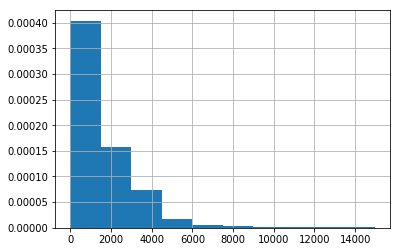

In [53]:
df.lyrics[df.lyrics.str.len() < 15000].str.len().hist(density=True)

In [117]:
df[(df.lyrics.str.len() > 2000) & (df.lyrics.str.len() < 3000)]

,msd_id,lyrics
0,TRAAAAW128F429D538,"\n\n[Verse 1]\nAlright, I might\nHave had a li..."
19,TRAACVS128E078BE39,\n\n[Intro: Mike Jones]\nWho?! Mike Jones (3x)...
28,TRAADVH128EF34DE7A,\n\nMr. Robot s01e05: eps1.4_3xpl0its.wmv\n\n-...
31,TRAAEAM128F934B199,\n\n[Intro]\n(Police Chatter)\n\n[Verse 1]\nHe...
40,TRAAFSM128F425A2C5,\n\n[Verse 1]\nI won't be told anymore\nThat I...
47,TRAAGKQ128F92EAF39,\n\n[Intro]\nJ’suis venu à vous un Famas à la ...
57,TRAAHER128F92E3FE9,"\n\n[Intro]\n\n[Verse 1: Richie Cunning, Grip ..."
61,TRAAHZP12903CA25F4,"\n\n[Pharoahe Monche]\nRecognize me nigga, loo..."
66,TRAAIHL128F92E6DDA,\n\n[Verse 1]\nDarlin' I can't explain\nWhere ...
75,TRAAJJA12903CC518A,\n\nIntro:\nYo Saafir what's goin' on playboy?...


In [120]:
df_msd2[df_msd2.trackid == 'TRAACVS128E078BE39']

,trackid,songid,artist,title,msd_id,song_url
34,TRAACVS128E078BE39,SOOLYAZ12A6701F4A6,Mike Jones (Featuring CJ_ Mello & Lil' Bran),Laws Patrolling (Album Version),TRAACVS128E078BE39,https://genius.com/Mike-jones-laws-patrolling-...


In [121]:
df_meta[df_meta.msd_id == 'TRAACVS128E078BE39'].song_url.values

array(['https://genius.com/Mike-jones-laws-patrolling-lyrics'], dtype=object)

Look at dissimilarity between song url and search terms

In [283]:
from src.data import scrape_genius_lyrics as scr

def DistJaccard(str1, str2):
    str1 = set(str1.split())
    str2 = set(str2.split())
    return float(len(str1 & str2)) / len(str1 | str2)

def levenshtein(s, t):
        ''' From Wikipedia article; Iterative with two matrix rows. '''
        if s == t: return 0
        elif len(s) == 0: return len(t)
        elif len(t) == 0: return len(s)
        v0 = [None] * (len(t) + 1)
        v1 = [None] * (len(t) + 1)
        for i in range(len(v0)):
            v0[i] = i
        for i in range(len(s)):
            v1[0] = i + 1
            for j in range(len(t)):
                cost = 0 if s[i] == t[j] else 1
                v1[j + 1] = min(v1[j] + 1, v0[j + 1] + 1, v0[j] + cost)
            for j in range(len(v0)):
                v0[j] = v1[j]
                
        return v1[len(t)]

In [300]:
def join_strings(row):
    if isinstance(row, list):
        return ' '.join(row)
    else:
        return np.nan
    
# parse search term
df_msd2['search'] = df_msd2.artist.apply(scr.remove_parentheses).str.lower() +\
' ' + df_msd2.title.astype(str).apply(scr.remove_parentheses).str.lower()

# parase song url
df_msd2['url2'] = df_msd2.song_url.str.extract('https://genius.com/(.+)', expand=False)\
                  .str.extract('(.*)-lyrics', expand=False)\
                  .str.split('-')\
                  .apply(join_strings)\
                  .str.lower()

df_msd2['lev_dist'] = df_msd2[['search','url2']]\
                      .apply(lambda x: levenshtein(*x) if not pd.isnull(x).any() else np.nan, axis=1)

df_msd2['jac_dist'] = df_msd2[['search','url2']]\
                      .apply(lambda x: DistJaccard(*x) if not pd.isnull(x).any() else np.nan, axis=1)


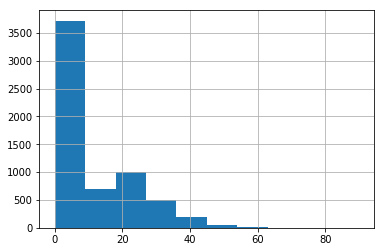

In [302]:
df_msd2.lev_dist.hist()

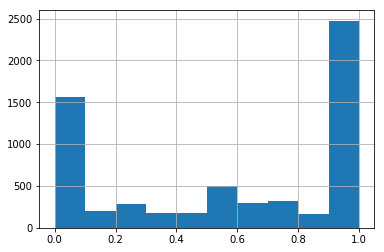

In [303]:
df_msd2.jac_dist.hist()

In [313]:
df_msd2[(df_msd2['jac_dist'] < 0.25) & (df_msd2['jac_dist'] > 0)].head(10)

,trackid,songid,artist,title,msd_id,song_url,search,url2,lev_dist,jac_dist
12,TRAABDL12903CAABBA,SOMUYGI12AB0188633,Andy Andy,La Culpa,TRAABDL12903CAABBA,https://genius.com/Andy-andy-voy-a-tener-que-o...,andy andy la culpa,andy andy voy a tener que olvidarte,20.0,0.125000
93,TRAAHDH128F93094B6,SOOVOKS12AB017EE57,Bézu,Le tortillard,TRAAHDH128F93094B6,https://genius.com/Sniper-niquer-le-systeme-ly...,bézu le tortillard,sniper niquer le systeme,21.0,0.166667
106,TRAAHYV128F932A425,SORAVUP12AB018556E,Carl Cox Vs Yousef,I Want You (Forever),TRAAHYV128F932A425,https://genius.com/Urltv-geechi-gotti-vs-gluea...,carl cox vs yousef i want you,urltv geechi gotti vs glueazy,25.0,0.090909
163,TRAAMFT128F93128AD,SOHHANU12A58A77C66,Mastodon,The Czar: Usurper/Escape/Martyr/Spiral (Album ...,TRAAMFT128F93128AD,https://genius.com/Mastodon-the-czar-usurper-e...,mastodon the czar: usurper/escape/martyr/spiral,mastodon the czar usurper escape martyr spiral...,23.0,0.166667
206,TRAAPXK128F934DF25,SOBNTXB12A8C1428BA,Daniela Dessì,New Age,TRAAPXK128F934DF25,https://genius.com/Spotify-new-music-friday-11...,daniela dessì new age,spotify new music friday 11 25 16,28.0,0.100000
221,TRAAQYN128F92ED77E,SOIFOLA12AB017CDA1,S.U.P,The Cube (Live),TRAAQYN128F92ED77E,https://genius.com/Richie-le-the-pho-song-lyrics,s.u.p the cube,richie le the pho song,17.0,0.142857
248,TRAATMY128F9334DAC,SOQAHUW12AB0181F04,Little Joe,Loco (Crazy),TRAATMY128F9334DAC,https://genius.com/Kamikaze-loon-lil-joe-lyrics,little joe loco,kamikaze loon lil joe,14.0,0.166667
268,TRAAUZI12903CAFD53,SOCWXYM12AB018BDF3,The Nightraver & The Magican,Drop the Bass,TRAAUZI12903CAFD53,https://genius.com/King-of-the-dot-bigg-k-vs-d...,the nightraver & the magican drop the bass,king of the dot bigg k vs danny myers,34.0,0.071429
273,TRAAVIH12903CFAC90,SOTYCYE12AC468AA08,Lady May,The Boss,TRAAVIH12903CFAC90,https://genius.com/Kool-g-rap-da-bosses-lady-l...,lady may the boss,kool g rap da bosses lady,18.0,0.111111
289,TRAAXCM128F427F97B,SOHCENZ12A8C13AC85,Malkit Singh,Hai Shava,TRAAXCM128F427F97B,https://genius.com/Malkit-singhbally-sagoo-gur...,malkit singh hai shava,malkit singhbally sagoo gur nalon ishq mitha,26.0,0.100000


In [137]:
a = df_msd2[df_msd2.trackid == 'TRAACVS128E078BE39'].artist.values[0] + ' ' + df_msd2[df_msd2.trackid == 'TRAACVS128E078BE39'].title.values[0]
a = a.lower()

b = 'Mike jones laws patrolling'.lower()

In [145]:
from src.data import scrape_genius_lyrics as scr

def DistJaccard(str1, str2):
    str1 = set(str1.split())
    str2 = set(str2.split())
    return float(len(str1 & str2)) / len(str1 | str2)

def levenshtein(s, t):
        ''' From Wikipedia article; Iterative with two matrix rows. '''
        if s == t: return 0
        elif len(s) == 0: return len(t)
        elif len(t) == 0: return len(s)
        v0 = [None] * (len(t) + 1)
        v1 = [None] * (len(t) + 1)
        for i in range(len(v0)):
            v0[i] = i
        for i in range(len(s)):
            v1[0] = i + 1
            for j in range(len(t)):
                cost = 0 if s[i] == t[j] else 1
                v1[j + 1] = min(v1[j] + 1, v0[j + 1] + 1, v0[j] + cost)
            for j in range(len(v0)):
                v0[j] = v1[j]
                
        return v1[len(t)]

DistJaccard(scr.remove_parentheses(a), b)

1.0

In [148]:
' '.join(scr.remove_parentheses(a).split())

'mike jones laws patrolling'

In [150]:
DistJaccard(' '.join(scr.remove_parentheses(a).split()), b)

1.0

In [153]:
import re
'https://genius.com/Mike-jones-laws-patrolling-lyrics'.split('/')[-1].split('-')

['Mike', 'jones', 'laws', 'patrolling', 'lyrics']

In [322]:
from src.data import scrape_genius_lyrics as scr
from dotenv import load_dotenv
import os
load_dotenv()
GENIUS = os.getenv("GENIUS")
GENIUS
scr.return_top_hit(['hey there delilah'], token=GENIUS)

{'highlights': [],
 'index': 'song',
 'result': {'annotation_count': 16,
  'api_path': '/songs/158737',
  'full_title': "Hey There Delilah by\xa0Plain\xa0White T's",
  'header_image_thumbnail_url': 'https://images.genius.com/f23d9e8c769dbf56248b7821a2cbdb24.240x240x1.jpg',
  'header_image_url': 'https://images.genius.com/f23d9e8c769dbf56248b7821a2cbdb24.240x240x1.jpg',
  'id': 158737,
  'lyrics_owner_id': 224995,
  'lyrics_state': 'complete',
  'path': '/Plain-white-ts-hey-there-delilah-lyrics',
  'primary_artist': {'api_path': '/artists/53121',
   'header_image_url': 'https://images.genius.com/a12780d1f1e91f33d3e95d822ea6134b.956x960x1.jpg',
   'id': 53121,
   'image_url': 'https://images.genius.com/a12780d1f1e91f33d3e95d822ea6134b.956x960x1.jpg',
   'is_meme_verified': False,
   'is_verified': False,
   'name': "Plain White T's",
   'url': 'https://genius.com/artists/Plain-white-ts'},
  'pyongs_count': 72,
  'song_art_image_thumbnail_url': 'https://images.genius.com/f23d9e8c769dbf562

In [323]:
GENIUS

'4HUKJIKpaGONh6ODVI4ov-scpoa67j2l796_1a1PuwLSCqaxx3H2Zuss6id2Fynm'